# Simplicial_Complex Class

In this notebook, we provide examples to illustrate the usage of the _Simplicial_Complex_ class provided in _sc_class.py_. The _Simplicial_Complex_ class provides methods to construct a simplicial complex and to compute the incidence matrix, the up-adjacency matrix and the up-Laplacian matrix at a specified dimension. It also provides methods to read a simplicial complex from and write a simplicial complex to a text file.

Following is a summary of the attributes and methods provided by the class:

Attributes:

    _dims        : Int.  _dims           : The dimension of the largest simplex in the simplicial complex.
    _nk          : List  _nk[k]          : The number of simplices of dimension k.
    _simplices   : List. _simplices[k]   : The list of all k-dimensional simplices.
    _incidences  : List. _incidences[k]  : The incidence matrix for simplices of dimension k.
    _laplacians  : List. _laplacians[k]  : The up-Laplacian for the simplices of dimension k.
    _adjacencies : List. _adjacencies[k] : The (oriented) adjacency matrix for simplices of dimension k.

The dimension of simplicial complex must be specified at initiation (\_\_init\_\_ sets the \_dims attribute).<br>
The incidence, up-Laplacian and adjacency matrices are not computed at initialization but they are stored in the corresponding attribute lists after first computation.

Methods:

    .add_simplices(dim, simplices)       : Adds simplices of specified dimension to the simplicial complex.
    .getWeights(dim)                     : Returns a list of weights for simplices of the specified dimension.
    .is_even(simplex)                    : Computes whether the orientation of a simplex is even or odd.
    .incidence(dim, weighted=False)      : Returns the incidence matrix for simplices of specified dimension.
    .up_Laplacian(dim)                   : Returns up-Laplacian for the specified dimension.
    .adjacency(dim)                      : Returns the up-adjacency matrix for simplices of specified dimension.
    .nxGraph(dim, draw=False, **kwargs)  : Returns the dual graph for specified dimension (a networkx graph).
    .writeToFile(fname)                  : Writes the simplicial complex to a CSV text file.
    .readFromFile(fname)                 : Reads a simplicial complex from a CSV text file.

We will now illustrate how to use the class. The first step is to import it into the work environment.

## Creating a Simplicial Complex

We will create a simple 2D simplicial complex with 4 vertices, all possible edges (6) and all possible triangles (4). This simplicial complex is the 2D skeleton of a tetrahedron.

A simplex is always assumed to be weighted and oriented.

    - A k-simplex is represented as a tuple of (k+2) elements.
    - The first (k+1) elements are the IDs of the vertices of the simplex.
    - The orientation of the simplex is given by the order of the vertex IDs.
    - The last element is the weight of the simplex.

We will create the simplicial complex in following steps:

    - Create an instance of Simplicial_Complex where the highest dimension (_dims attribute) is 2.
    - Create a list of (ID, weight) tuples for the vertices.
    - Create a list of (ID_s, ID_t, weight) tuples for the edges. ID_s, ID_t: IDs of source and target vertices.
    - Create a list of (ID_a, ID_b, ID_c, weight) tuples for the triangles.
    - Add the simplices to the Simplicial_Complex instance.

For simplicity, let all simplices have weight 1.0

In [1]:
from sc_class import Simplicial_Complex
from itertools import combinations

# Set the number of vertices
nvert = 4
vertexIDs = range(nvert)

s0 = [(v,1.0) for v in vertexIDs]                    # list of (v, weight) tuples for vertices.
s1 = [s+(1.0,) for s in combinations(vertexIDs, 2)]  # list of (v0, v1, weight) tuples for edges.
s2 = [s+(1.0,) for s in combinations(vertexIDs, 3)]  # list of (v0, v1, v2, weight) tuples for triangles.

SC = Simplicial_Complex(dims=2)                      # Create an instance of 2-dimensional simplicial complex
SC.add_simplices(dim=0, simplices=s0)                # Add vertices to SC
SC.add_simplices(dim=1, simplices=s1)                # Add edges to SC
SC.add_simplices(dim=2, simplices=s2)                # Add triangles to SC

print(SC._nk)                                        # Print the number of simplices of each dimension in SC
print('Vertices: ', SC._simplices[0])                # Print the list of vertices (0-dimensional simplices)
print('Edges: ', SC._simplices[1])                   # Print the list of edges (1-dimensional simplices)
print('Triangles: ', SC._simplices[2])               # Print the list of triangles (2-dimensional simplices)

[4, 6, 4]
Vertices:  [(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0)]
Edges:  [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (1, 3, 1.0), (2, 3, 1.0)]
Triangles:  [(0, 1, 2, 1.0), (0, 1, 3, 1.0), (0, 2, 3, 1.0), (1, 2, 3, 1.0)]


## Simplicial Complex Generators

"sc_class.py" also provides two generators of simplicial complexes.

    generateCompleteSC_2D(nvert): Generates a complete 2D complex (all edges, triangles) with "nvert" vertices.

\*All simplices are assumed to have unit weights.

We can use _generateCompleteSC_2D(nvert=4)_ to construct the same simplicial complex (SC) as the one above.<br>

In [2]:
from sc_class import generateCompleteSC_2D

SC_1 = generateCompleteSC_2D(4)  # same as SC we created above
print(SC_1._nk)
print('Vertices: ', SC_1._simplices[0])
print('Edges: ', SC_1._simplices[1])
print('Triangles: ', SC_1._simplices[2])

[4, 6, 4]
Vertices:  [(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0)]
Edges:  [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (1, 3, 1.0), (2, 3, 1.0)]
Triangles:  [(0, 1, 2, 1.0), (0, 1, 3, 1.0), (0, 2, 3, 1.0), (1, 2, 3, 1.0)]


The second generator provided in _sc_class.py_ is _generateDumbbellSC_2D_.

    generateDumbbellSC_2D(nvert): Generates a dumbbell-shaped 2D complex with "nvert" vertices.

\*The simplicial complex has two complete subcomplexes with (nvert/2) vertices. The two subcomplexes are connected with cross edges and triangles.<br>
\*All simplices are assumed to have unit weights.

We can use the _nxGraph_ method of the Simplicial_Complex class to visualize the dual graph of the dumbbell complex at dimension 1, i.e., vertices of the dual graph represent edges in the complex and vertices in the dual graph are connected in the corresponding edges of the complex share a triangle.

The "nxGraph" method creates and returns an instance of a networkx graph. We can use the graph drawing methods provided by networkx to visualize this dual graph.

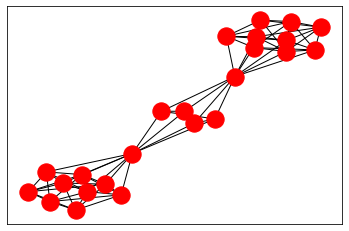

In [3]:
from sc_class import generateDumbbellSC_2D

# Generate a Dumbbell-shaped 2D complex
SC_2 = generateDumbbellSC_2D(nvert=10)

# Visualize the dual graph at dimension 1.
SC_2_nxG = SC_2.nxGraph(dim=1, draw=True, with_labels=False, node_color='red', edge_color='black')

## Reading From and Writing to Files

The easiest way to create a simplicial complex is to read it from a text file. The Simplicial_Complex class provides methods to read a simplicial complex from and write a simplicial complex to a text file. The format of the file (similar to OFF) is as follows:

For a K-dimensional simplicial complex

    - First line is a comma separated list of the number of simplices of each dimension, from 0 to K.
    - From the second line onward - each line represents a simplex.
        - A simplex is recorded as a comma separated list of vertex IDs.
        - The last entry is the weight of the simplex.
    - The file must list simplicial complexes in the increasing order of dimensions, i.e., all the vertices first, then all the edges, then all the triangles and so on.

For example, the 2D simplicial complex SC we created earlier (the 2D skeleton of a tetrahedron with 4 vertices, 6 edges, 4 triangles) can be written as:

tetrahedron_2D_skeleton.txt
- - - - - - - - - - - - - - -
4, 6, 4<br>
0, 1.0<br>
1, 1.0<br>
2, 1.0<br>
3, 1.0<br>
0, 1, 1.0<br>
0, 2, 1.0<br>
0, 3, 1.0<br>
1, 2, 1.0<br>
1, 3, 1.0<br>
2, 3, 1.0<br>
0, 1, 2, 1.0<br>
0, 1, 3, 1.0<br>
0, 2, 3, 1.0<br>
1, 2, 3, 1.0<br>
- - - - - - - - - - - - - - -

The text file is included in the _sc_examples_ directory. To read a simplicial complex from a file, we create an instance of the _Simplicial_Complex_ class (it is assumed that the dimension K of the simplicial complex is known), and call the **_readFromFile()_** method with the filename.

In [4]:
SC_3 = Simplicial_Complex(dims=2)
SC_3.readFromFile(fname='./sc_examples/tetrahedron_2D_skeleton.txt')
print(SC_3._nk)
print('Vertices: ', SC_3._simplices[0])
print('Edges: ', SC_3._simplices[1])
print('Triangles: ', SC_3._simplices[2])

[4, 6, 4]
Vertices:  [(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0)]
Edges:  [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (1, 3, 1.0), (2, 3, 1.0)]
Triangles:  [(0, 1, 2, 1.0), (0, 1, 3, 1.0), (0, 2, 3, 1.0), (1, 2, 3, 1.0)]


To write a simplicial complex to a file, simply call the **_writeToFile()_** method with the filename.
The function will return _True_ if the file was successfully written.
For example, to write the dumbbell-shaped complex SC_2 to a file named Dumbbell_2D_10vert.txt in sc_examples:

In [5]:
SC_2.writeToFile(fname='sc_examples/Dumbbell_2D_10vert.txt')

True

Once we have an instance of _Simplicial_Complex_ class, we can call the corresponding methods to compute the incidence matrix, the up-Laplacian, and the (oriented) up-adjacency matrix for a specific dimension k. If K is the dimension of the simplicial complex, then 0 <= k <= K-1.

_.incidence(dim=k)_ returns a matrix encoding incidence relations between simplices of dimensions (k+1) and k.

_.up_Laplacian(dim=k)_ returns the _up-Laplacian_ at dimension k.

_.adjacency(dim=k, weighted=False)_ returns the binary adjacency relations between k-simplices via shared (k+1)-simplices. If _weighted=True_, the adjacencies are wighted by the weights of the shared (k+1)-simplices.

These matrices are not computed at initialization. But stored in the corresponding attribute lists at the first computation. They are stored as CSC matrices from _scipy.sparse_.

In [6]:
SC_2.incidence(dim=1)
SC_2.up_Laplacian(dim=1)
SC_2.adjacency(dim=1)

print(SC_2._nk)                   # number of vertices, edges and triangles in SC_2
print(SC_2._incidences[1].shape)  # shape of the triangle-edge incidence matrix
print(SC_2._laplacians[1].shape)  # shape of the up-Laplacian at dimension 1 (for edges)
print(SC_2._adjacencies[1].shape) # shape of the adjacency matrix for edges (adjacent via shared triangles)

[10, 24, 24]
(24, 24)
(24, 24)
(24, 24)
